In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import build_montages
from imutils import paths
from imutils.paths import list_images
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import os
import pickle
from typing import List

In [47]:
def load_split (path) :
  imagePaths = list (paths . list_images (path) )
  data = []
  labels = []
  for imagePath in imagePaths:
    label = imagePath . split (os . path . sep) [-2]
    image = cv2. imread(imagePath)
    image = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
    image = cv2. resize (image, (200, 200) )
    image = cv2. threshold(image, 0, 255,
    cv2.THRESH_BINARY_INV | cv2. THRESH_OTSU) [1]
    features = quantify_image (image)
    data.append(features)
    labels.append(label)
  return (np . array (data) , np . array(labels) )

In [48]:
def quantify_image(image):
  features=feature.hog(image,orientations=9,pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt= True ,block_norm="L1")
  return features

In [49]:
trainingpath=r"/content/drive/MyDrive/dataset/spiral/training"
testingpath=r"/content/drive/MyDrive/dataset/spiral/testing"

(X_train,y_train)=load_split(trainingpath)
(X_test,y_test)=load_split(testingpath)

In [50]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
print(X_train.shape,y_train.shape)

(72, 12996) (72,)


In [51]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
testingpaths=list(paths.list_images(testingpath))
idxs=np.arange(0,len(testingpaths))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

In [53]:
for i in idxs:
  image=cv2.imread(testingpaths[i])
  output=image.copy()
  output=cv2.resize(output,(128,128))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image=cv2.resize(image,(200,200))
  image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
  features=quantify_image(image)
  pred=model.predict([features])
  label=le.inverse_transform(pred)[0]
  color=(0,255,0) if label=="healthy" else (0,0,255)
  cv2.putText(output,label,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
  images.append(output)



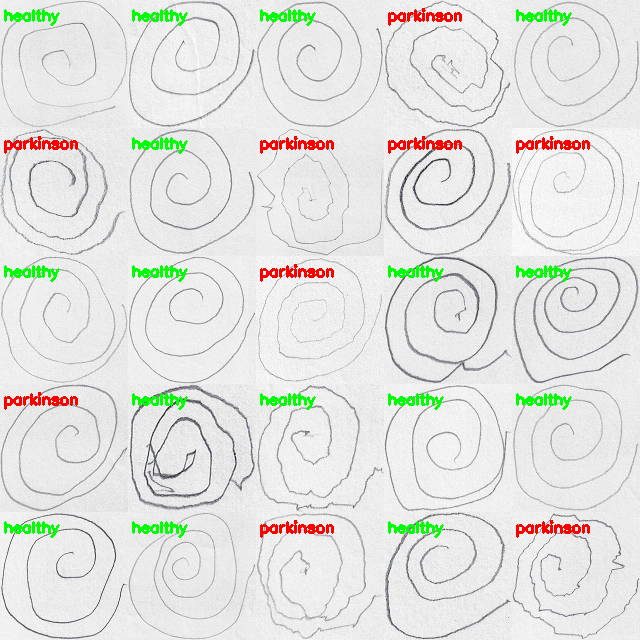

In [54]:
montage=build_montages(images,(128,128),(5,5))[0]
cv2_imshow(montage)